In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\ISMAIL\OneDrive\Documents\[TutsNode.com] - 2021 Python for Machine Learning & Data Science Masterclass\19 - Supervised Learning Capstone Project - Cohort Analysis and Tree Based Methods\31389400-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
##General Feature Exploration
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

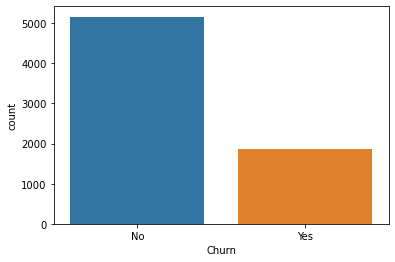

In [9]:
sns.countplot(data = df, x='Churn');

In [10]:
#displaying the balance of the class labels(Churn) with a count plot
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

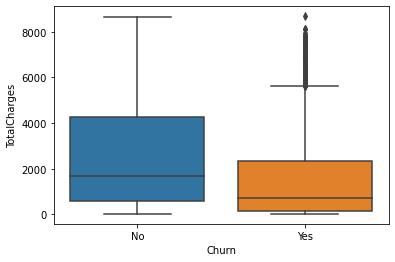

In [11]:
sns.boxplot(data=df, x='Churn', y='TotalCharges');

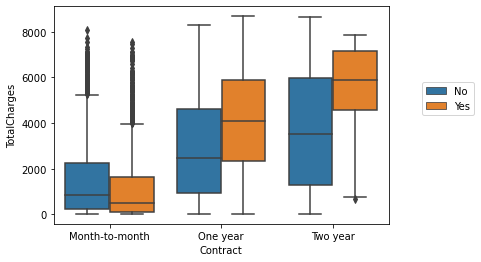

In [15]:
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1,0.5))

In [19]:
#A bar plot showing the correlation of the following features to the class label.
#Will convert it into dummy variables, as I can only calculatr numeric features
corr_df = pd.get_dummies(df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]).corr()

In [25]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

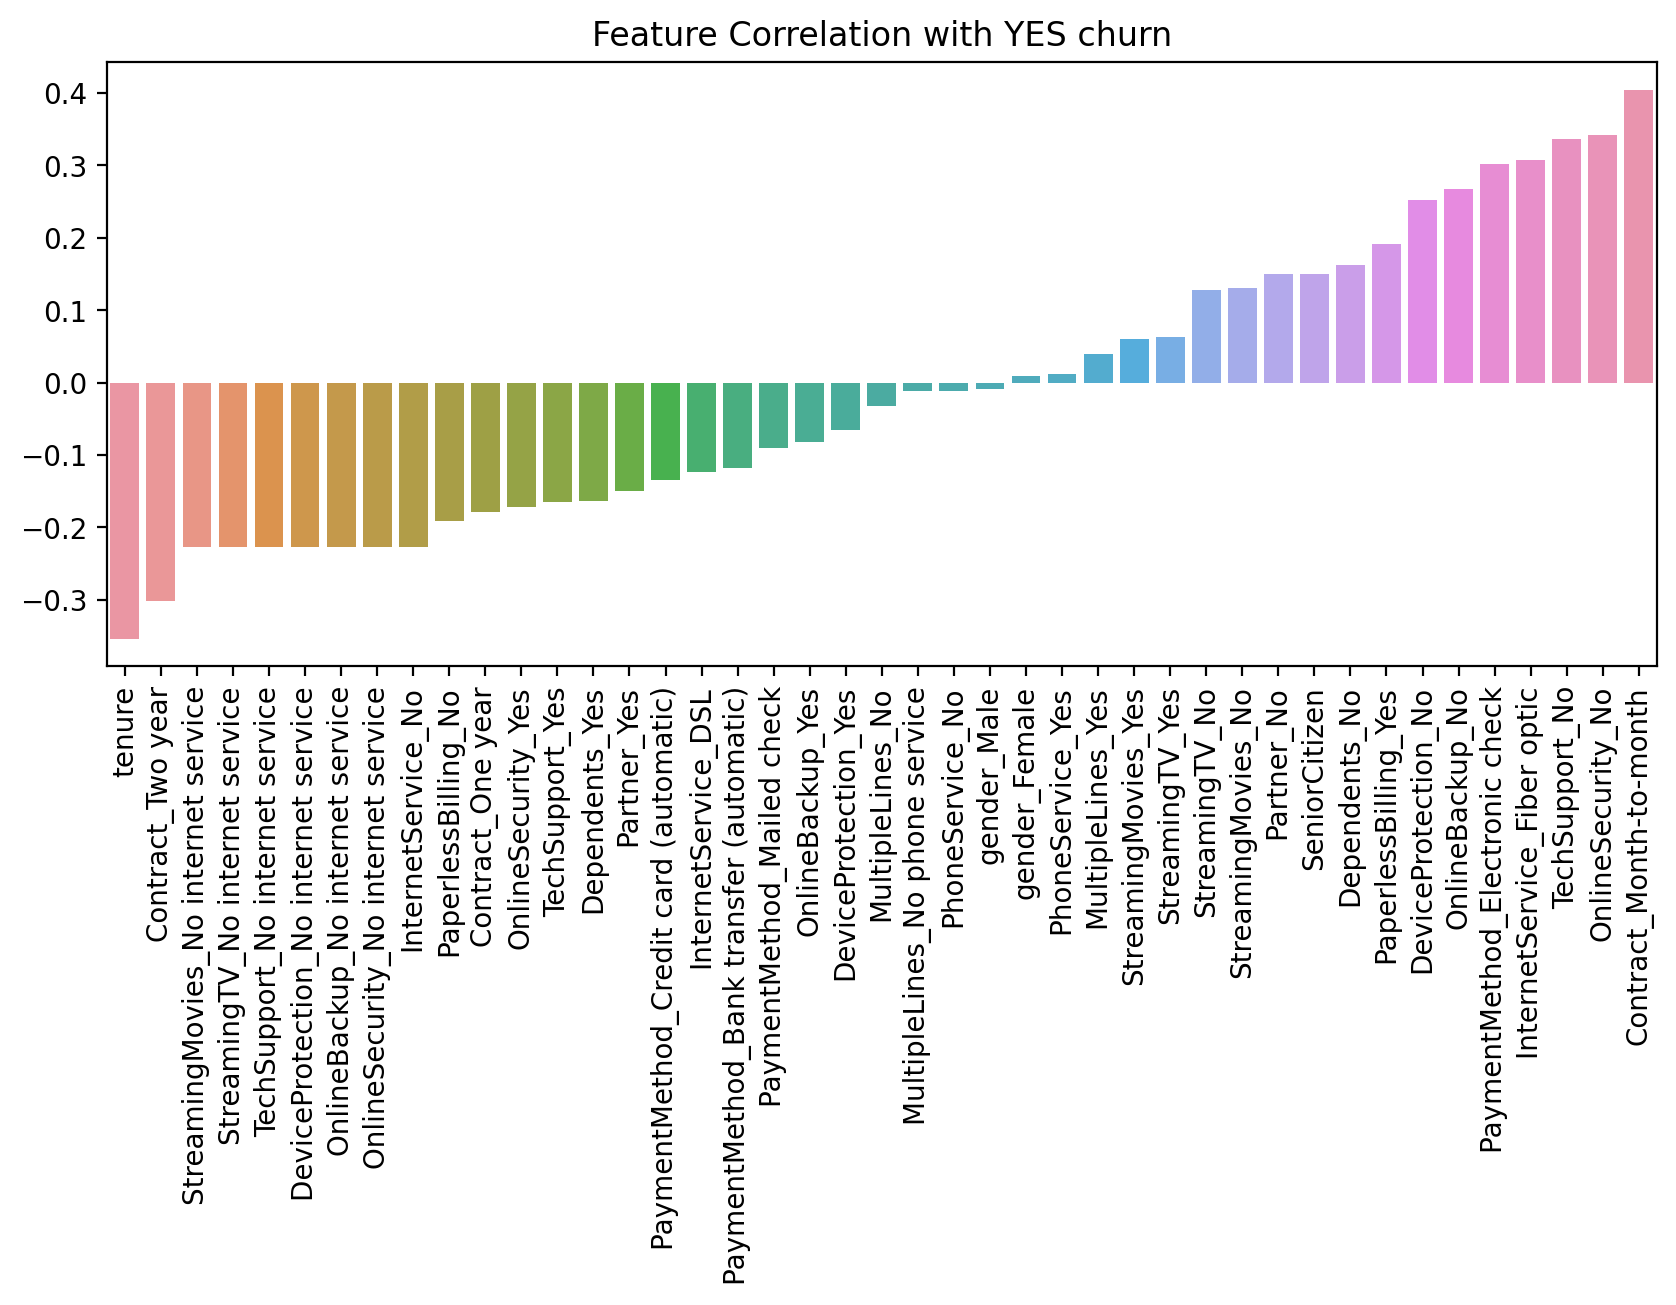

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with YES churn');

In [31]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

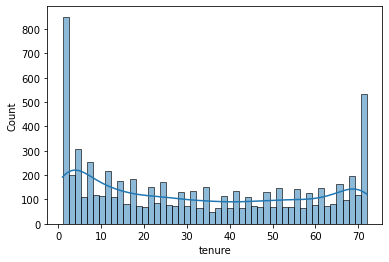

In [37]:
#Churn Analysis
#Histogram displaying the distribution of 'tenure' column, which is 
#the amount of months a customer was or has been a customer
sns.histplot(data = df, x = 'tenure',  kde = True, bins = 50);

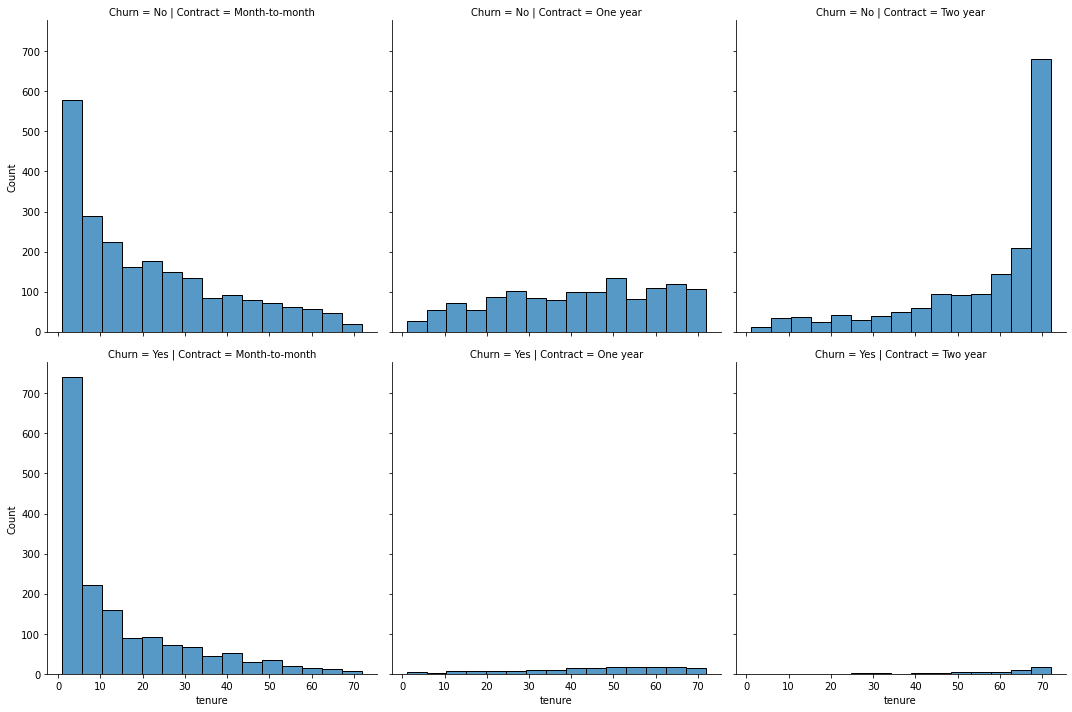

In [39]:
sns.displot(data = df,x='tenure',col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

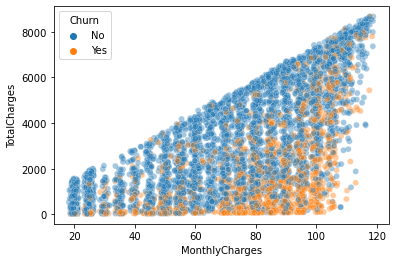

In [44]:
sns.scatterplot(data=df, x ='MonthlyCharges', y = 'TotalCharges',hue='Churn',alpha=0.4)
#From the plot, customers tend to churn when the monthly charges increases

In [50]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [51]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [54]:
churn_rate = 100*yes_churn/(no_churn + yes_churn)

<AxesSubplot:xlabel='tenure'>

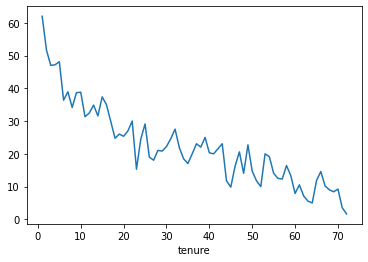

In [56]:
churn_rate.transpose()['customerID'].plot()

In [57]:
#Using the tenure column values, we createa new column called Tenure Cohort that creates 4 seperate categories
#0-12 months, 12-24 months, 24-48 months, over 48 months
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'over 48 Months'

In [59]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

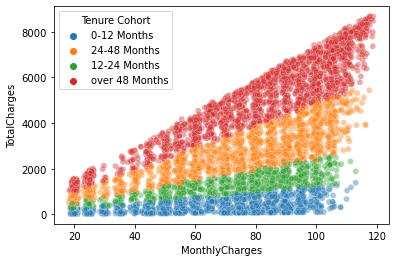

In [61]:
sns.scatterplot(data=df, x ='MonthlyCharges', y = 'TotalCharges',hue='Tenure Cohort',alpha=0.4);

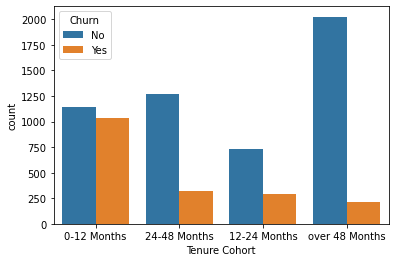

In [63]:
#creating a count plot showing the churn count per cohort
sns.countplot(data=df, x ='Tenure Cohort', hue = 'Churn');

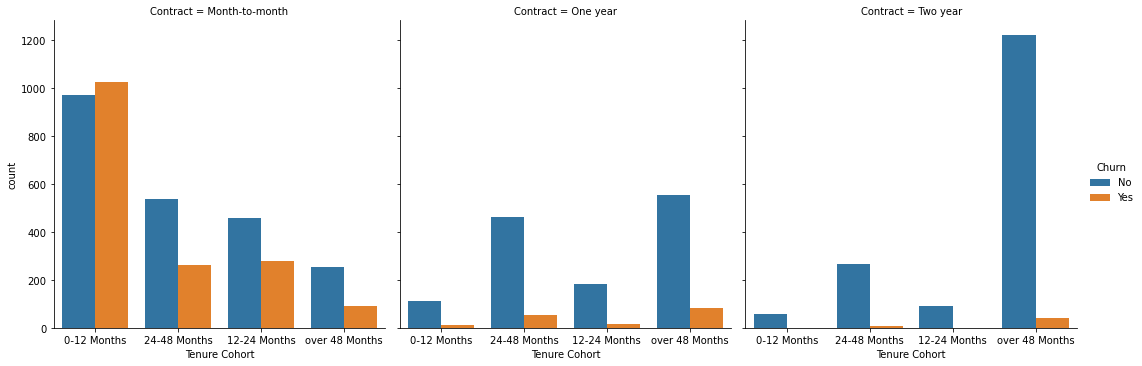

In [65]:
#creating a grid of countplots showing counts per tenure cohort, seperated out by contract type and colored by the churn hue
sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', kind = 'count', col = 'Contract');

In [70]:
#Predictive modelling using (A Single Decision Tree)
from sklearn.model_selection import train_test_split
X = df.drop(['Churn','customerID'], axis=1)
X = pd.get_dummies(X,drop_first=True)
y =df['Churn']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)

In [74]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [75]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [76]:
preds = dt.predict(X_test)

In [78]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1052
         Yes       0.63      0.40      0.49       355

    accuracy                           0.79      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



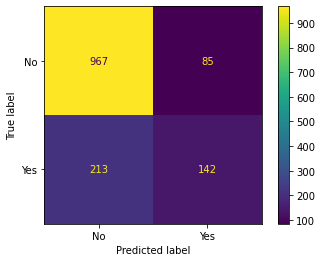

In [80]:
plot_confusion_matrix(dt,X_test,y_test);

In [96]:
important_features = pd.DataFrame(data = dt.feature_importances_, index=X.columns, columns=['Feat Imp'])
important_features = important_features.sort_values('Feat Imp')

In [97]:
important_features = important_features[important_features['Feat Imp']>0]
important_features

,Feat Imp
gender_Male,0.000345
PaymentMethod_Credit card (automatic),0.001159
Dependents_Yes,0.001208
Partner_Yes,0.001378
OnlineSecurity_Yes,0.004095
OnlineBackup_Yes,0.008320
MultipleLines_No phone service,0.008386
Contract_One year,0.009355
TechSupport_Yes,0.009561
MultipleLines_Yes,0.011427


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'gender_Male'),
  Text(1, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(2, 0, 'Dependents_Yes'),
  Text(3, 0, 'Partner_Yes'),
  Text(4, 0, 'OnlineSecurity_Yes'),
  Text(5, 0, 'OnlineBackup_Yes'),
  Text(6, 0, 'MultipleLines_No phone service'),
  Text(7, 0, 'Contract_One year'),
  Text(8, 0, 'TechSupport_Yes'),
  Text(9, 0, 'MultipleLines_Yes'),
  Text(10, 0, 'PaperlessBilling_Yes'),
  Text(11, 0, 'SeniorCitizen'),
  Text(12, 0, 'DeviceProtection_No internet service'),
  Text(13, 0, 'OnlineBackup_No internet service'),
  Text(14, 0, 'Contract_Two year'),
  Text(15, 0, 'PaymentMethod_Electronic check'),
  Text(16, 0, 'MonthlyCharges'),
  Text(17, 0, 'TotalCharges'),
  Text(18, 0, 'InternetService_Fiber optic'),
  Text(19, 0, 'tenure')])

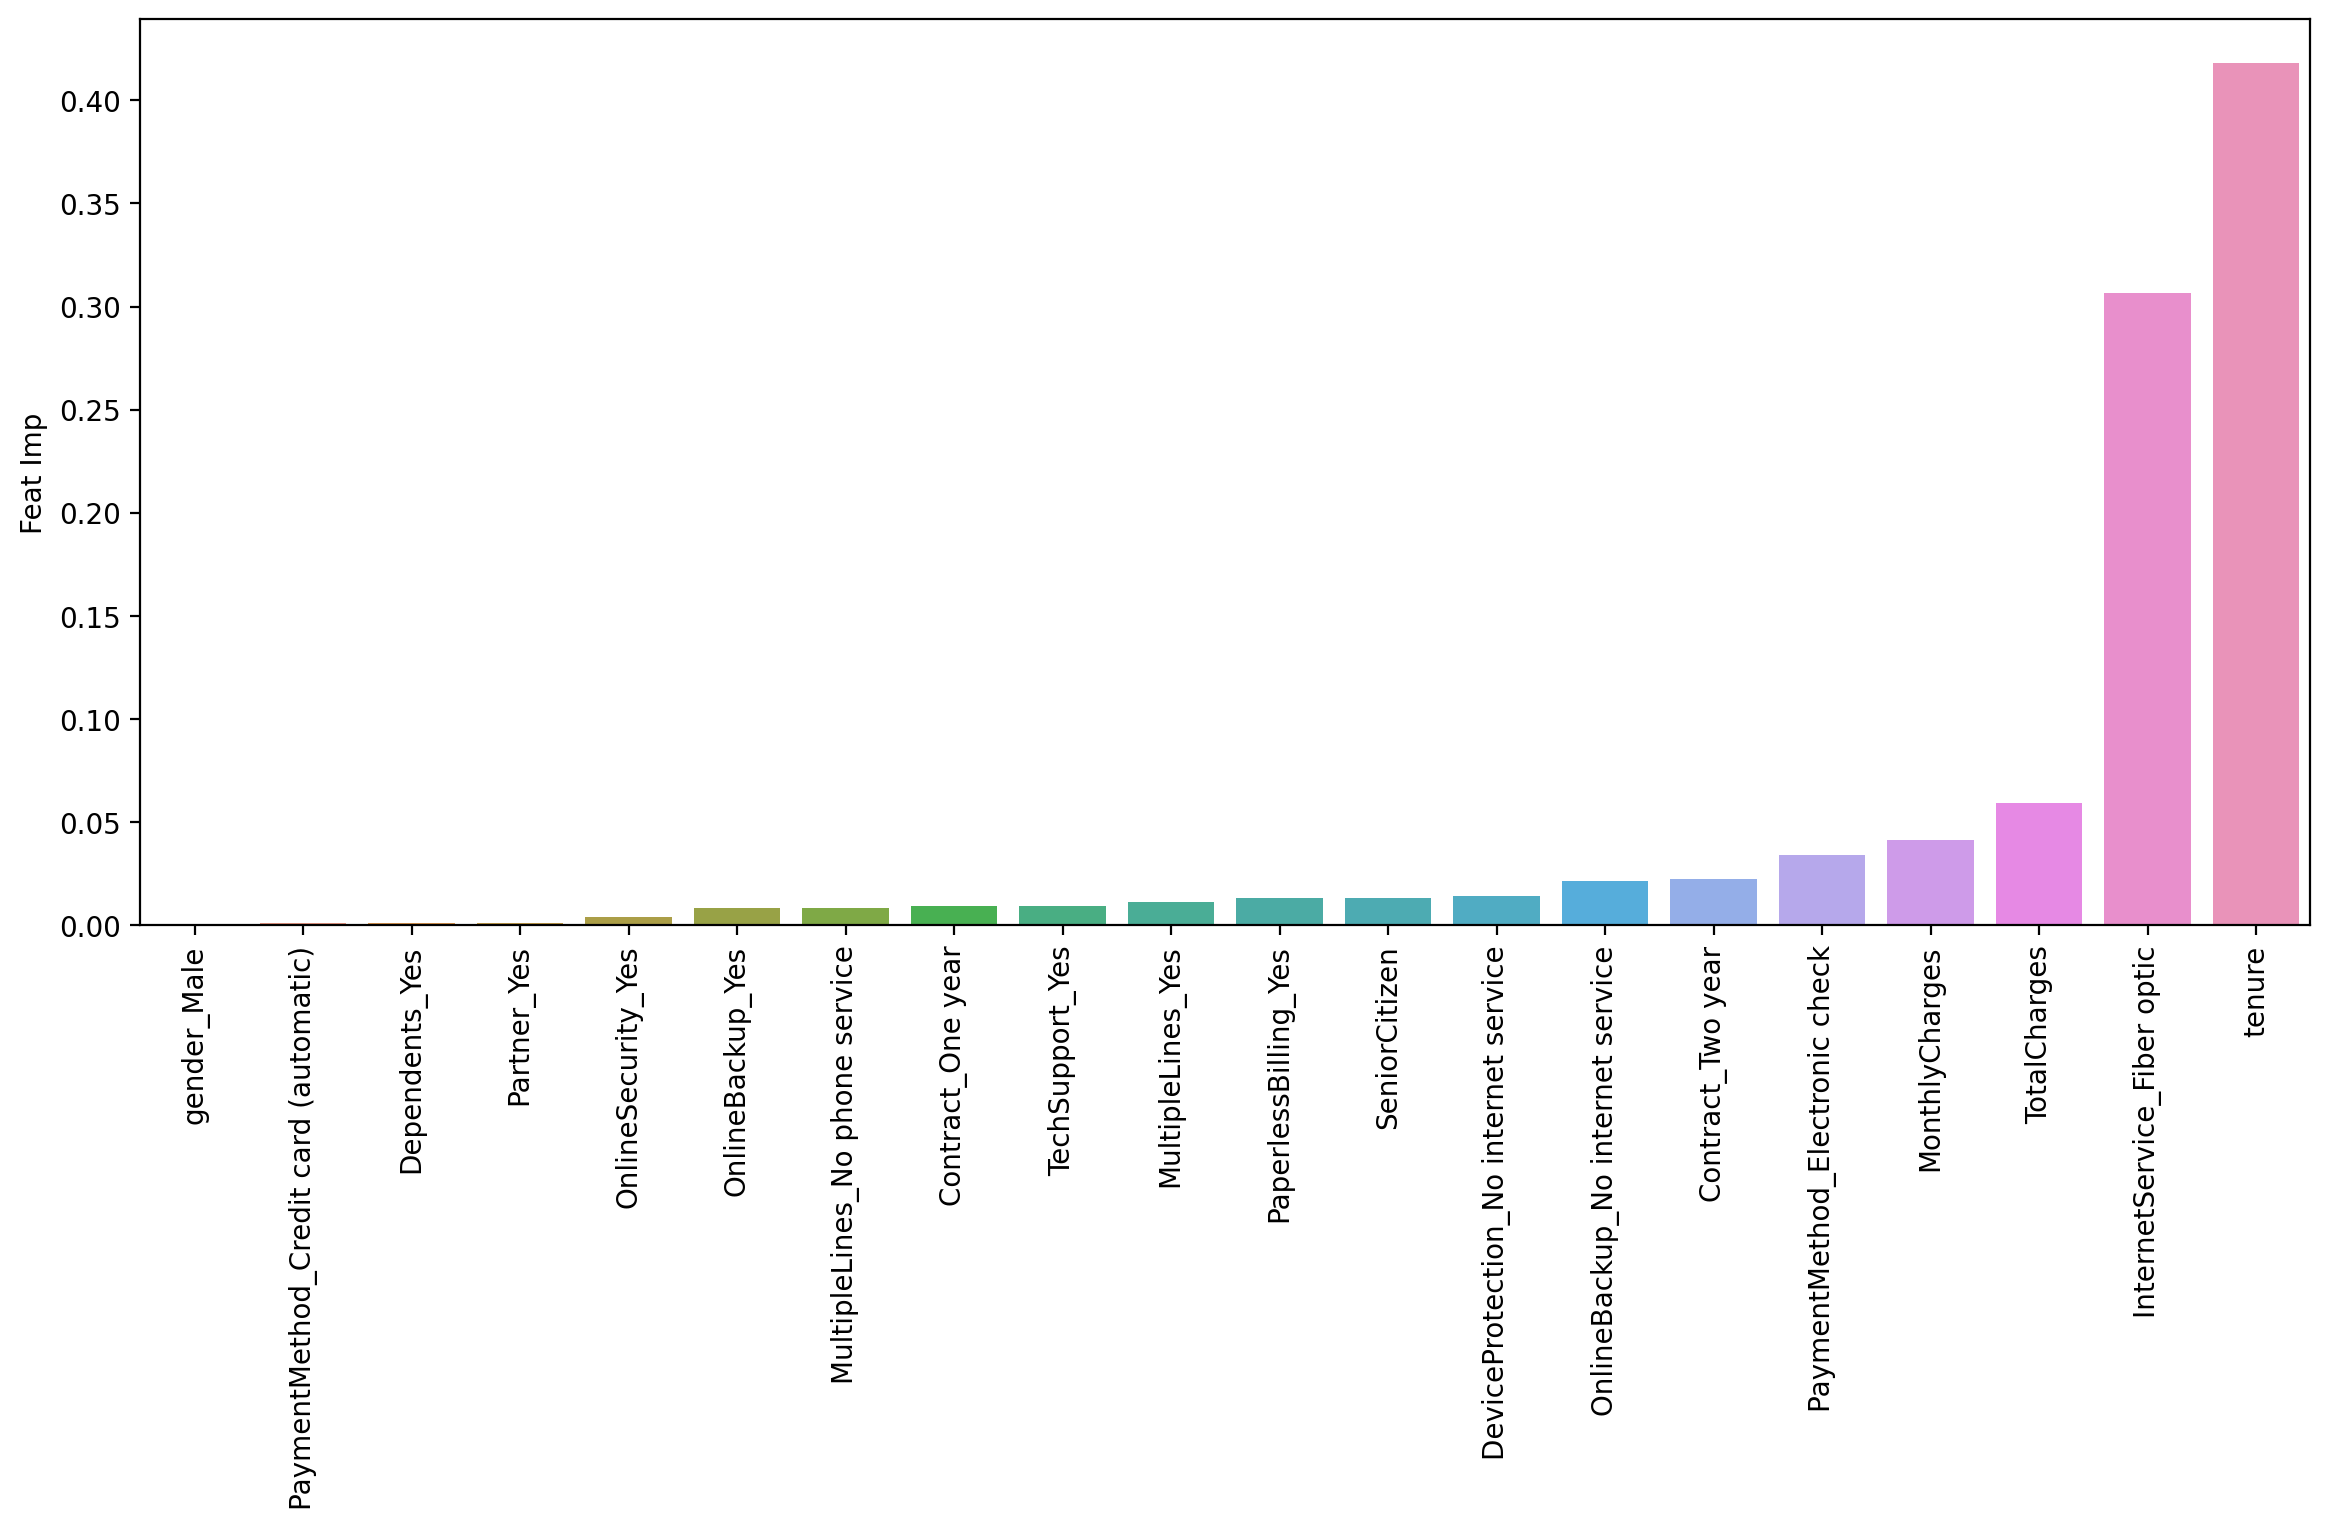

In [99]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = important_features, x =important_features.index, y='Feat Imp')
plt.xticks(rotation=90)

In [100]:
from sklearn.tree import plot_tree

[Text(166.86346153846154, 201.90857142857143, 'X[1] <= 17.5\ngini = 0.393\nsamples = 5625\nvalue = [4111, 1514]'),
 Text(82.26923076923077, 170.84571428571428, 'X[10] <= 0.5\ngini = 0.496\nsamples = 2111\nvalue = [1149, 962]'),
 Text(45.06923076923077, 139.78285714285715, 'X[1] <= 3.5\ngini = 0.409\nsamples = 1194\nvalue = [851, 343]'),
 Text(22.892307692307693, 108.72, 'X[14] <= 0.5\ngini = 0.493\nsamples = 487\nvalue = [272, 215]'),
 Text(11.446153846153846, 77.65714285714284, 'X[0] <= 0.5\ngini = 0.495\nsamples = 289\nvalue = [130, 159]'),
 Text(5.723076923076923, 46.59428571428572, 'X[26] <= 0.5\ngini = 0.5\nsamples = 251\nvalue = [122, 129]'),
 Text(2.8615384615384616, 15.531428571428563, 'gini = 0.491\nsamples = 120\nvalue = [68, 52]'),
 Text(8.584615384615384, 15.531428571428563, 'gini = 0.485\nsamples = 131\nvalue = [54, 77]'),
 Text(17.16923076923077, 46.59428571428572, 'X[3] <= 45.15\ngini = 0.332\nsamples = 38\nvalue = [8, 30]'),
 Text(14.307692307692308, 15.531428571428563,

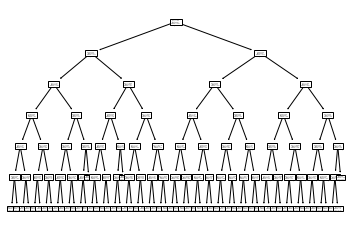

In [102]:
plot_tree(dt)

In [103]:
#Using Random Forests
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf = RandomForestClassifier()

In [106]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
preds = rf.predict(X_test)

In [110]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1052
         Yes       0.60      0.49      0.54       355

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



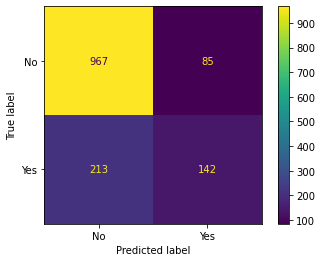

In [112]:
plot_confusion_matrix(dt,X_test,y_test)

In [113]:
#Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [126]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [127]:
gb_model = GradientBoostingClassifier()

In [128]:
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [129]:
ada_preds = ada_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

In [130]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1052
         Yes       0.64      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [131]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.65      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



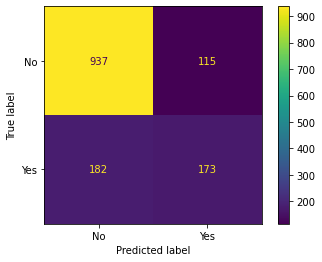

In [132]:
plot_confusion_matrix(rf,X_test,y_test);

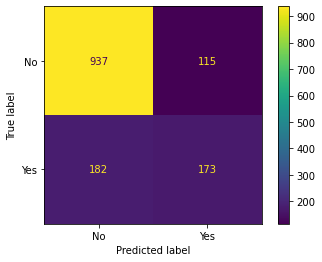

In [133]:
plot_confusion_matrix(rf,X_test,y_test);